In [1]:
import numpy as np
import pandas as pd
import math


In [2]:
df_housing = pd.read_csv('Data/CleanHnetData.csv')
pd.set_option('display.max_columns', None)

In [3]:
df_housing['Date'] = df_housing['Date'].astype(str)
df_housing

Date               Adress   Size  Rooms             Broker  Rent  \
0       2022105   Lilla Erstagatan 4  149.0      4            Unknown  6262   
1      20210813        Narvavägen 33  129.0      4  Richard Lagerling  5986   
2      20220222       Riddargatan 49  148.0      5  Richard Lagerling  4365   
3      20220330     Styrmansgatan 55  150.0      4  Richard Lagerling  8005   
4      20210913        Sturegatan 58  150.0      4  Richard Lagerling  5649   
...         ...                  ...    ...    ...                ...   ...   
16695  20210913   Skäftingebacken 25   46.0      1            Unknown  3137   
16696  20131115      Bärkingeplan 15  109.0      5            Unknown  6668   
16697   2021075       Talmansgränd 3   32.0      2            Unknown  2246   
16698  20221122         Almbygatan 6   24.0      1            Unknown  1600   
16699   2022048  LM Ericssons väg 20   85.0      4            Unknown  3540   

          Price    Datetime  PricePerKvm  NearbyPOIs   Latitude  Longitude  
0      45000000  2022-10-05       302013         846  59.316684  18.087616  
1      34000000  2021-08-13       263566         511  59.336651  18.090363  
2      30500000  2022-02-22       206081         616  59.332448  18.090363  
3      27100000  2022-03-30       180667         659  59.336651  18.088303  
4      27000000  2021-09-13       180000        1000  59.342603  18.078690  
...         ...         ...          ...         ...        ...        ...  
16695   1195000  2021-09-13        25978          22  59.396829  17.902908  
16696   1175000  2013-11-15        10780          18  59.392284  17.898102  
16697   1100000  2021-07-05        34375          41  59.278471  18.115082  
16698   1095000  2022-11-22        45625          74  59.392634  17.931061  
16699    769000  2022-04-08         9047          89  59.299511  17.995605  

[16700 rows x 12 columns]

In [4]:
data = np.array(list(df_housing[['Latitude', 'Longitude', 'Price']].apply(tuple, axis=1)))

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

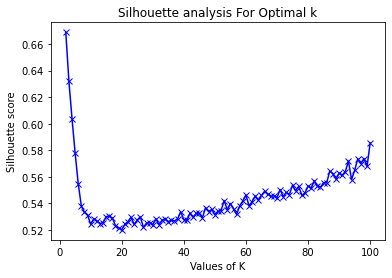

In [6]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters).fit(data)
    # silhouette score
    silhouette_avg.append(silhouette_score(data, kmeans.labels_))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
    

plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [7]:
silhouette_avg

[0.6688299893772409,
 0.6320399539383931,
 0.6038941184852611,
 0.5781585159545021,
 0.5548628850949258,
 0.5380215601989137,
 0.5333549197116637,
 0.5313015458081188,
 0.52433896342586,
 0.5285493543393134,
 0.5268822157286548,
 0.5248353601907542,
 0.5255542354996662,
 0.529976212951592,
 0.5303724990320555,
 0.5289622478065611,
 0.5232352176439112,
 0.5215753995924195,
 0.5200269144749602,
 0.5242692484152288,
 0.5262056912620404,
 0.5295263025300022,
 0.5241808481775188,
 0.5275036598379655,
 0.5298129463872807,
 0.5218840081944683,
 0.5251675452784816,
 0.5254845448974547,
 0.5240382876346449,
 0.5284246474402492,
 0.5240144432446953,
 0.5272419899659179,
 0.528366745926621,
 0.5263158312564586,
 0.527277507786125,
 0.5266800632488307,
 0.5283894877082048,
 0.5336909048525839,
 0.5278197624340728,
 0.5272274064015953,
 0.5327098533883519,
 0.5294401397487997,
 0.5326108783990979,
 0.5326433907690593,
 0.5292630555626271,
 0.5368451429336375,
 0.5338195426732415,
 0.535557126354754

# Plotting all the housing data

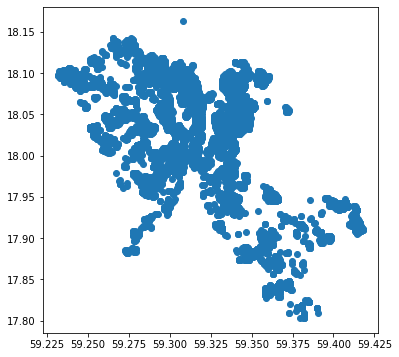

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,6)) 
ax = fig.add_subplot(1, 1, 1)
ax.scatter(data[:,0],data[:,1])
fig.canvas.draw()

#ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red')

fig.canvas.draw()

# Plotting 2 clusters based on location (Latitude, Longitude) and the price.

### It shows that prices in the center are higher than in the outskirts.

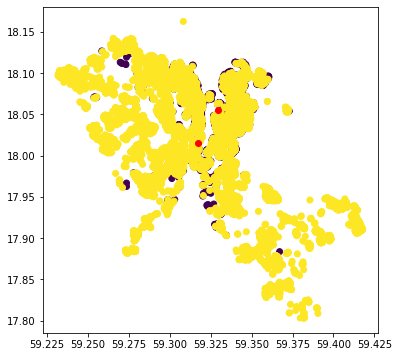

In [9]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(data)

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,6)) 
ax = fig.add_subplot(1, 1, 1)
ax.scatter(data[:,0],data[:,1], c = kmeans.labels_)
fig.canvas.draw()

ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red')

fig.canvas.draw()

# 1 Room apartment 


In [10]:
df_housing_room = df_housing[df_housing['Rooms'] == 1]
#df_type_room = df_housing[df_housing['accommodates'] == 2]
#df_housing_room = df_housing
df_housing_room

Date                              Adress  Size  Rooms  \
1241   20211214                        Karlaplan 14  59.0      1   
4543    2022021                      Nybrogatan 57A  53.0      1   
4886    2022094                      Nybrogatan 19B  39.0      1   
4934    2022047                       Mariatorget 7  54.0      1   
5156   20220223              Kungsklippan 11 - 6 tr  42.0      1   
...         ...                                 ...   ...    ...   
16692  20221119                     Hjulstavägen 92  22.0      1   
16693   2021101  Bygärdesvägen 4 - Accepterat pris!  22.0      1   
16694  20221111                  Nykarlebygatan 120  42.5      1   
16695  20210913                  Skäftingebacken 25  46.0      1   
16698  20221122                        Almbygatan 6  24.0      1   

               Broker  Rent     Price    Datetime  PricePerKvm  NearbyPOIs  \
1241          Unknown  1883  11250000  2021-12-14       190678         476   
4543          Unknown  2857   6750000  2022-02-01       127358        1100   
4886   Elise Mattsson  1708   6500000  2022-09-04       166667        1300   
4934          Unknown  1089   6450000  2022-04-07       119444        1400   
5156          Unknown  3457   6260000  2022-02-23       149048        1300   
...               ...   ...       ...         ...          ...         ...   
16692         Unknown  1568   1245000  2022-11-19        56591          72   
16693         Unknown  1452   1225000  2021-10-01        55682          15   
16694         Unknown  3308   1200000  2022-11-11        28235          16   
16695         Unknown  3137   1195000  2021-09-13        25978          22   
16698         Unknown  1600   1095000  2022-11-22        45625          74   

        Latitude  Longitude  
1241   59.338052  18.091049  
4543   59.338052  18.080063  
4886   59.335250  18.077316  
4934   59.317736  18.063583  
5156   59.329997  18.047104  
...          ...        ...  
16692  59.392284  17.929688  
16693  59.380046  17.916641  
16694  59.410809  17.916641  
16695  59.396829  17.902908  
16698  59.392634  17.931061  

[2208 rows x 12 columns]

In [11]:
df_housing_room

Date                              Adress  Size  Rooms  \
1241   20211214                        Karlaplan 14  59.0      1   
4543    2022021                      Nybrogatan 57A  53.0      1   
4886    2022094                      Nybrogatan 19B  39.0      1   
4934    2022047                       Mariatorget 7  54.0      1   
5156   20220223              Kungsklippan 11 - 6 tr  42.0      1   
...         ...                                 ...   ...    ...   
16692  20221119                     Hjulstavägen 92  22.0      1   
16693   2021101  Bygärdesvägen 4 - Accepterat pris!  22.0      1   
16694  20221111                  Nykarlebygatan 120  42.5      1   
16695  20210913                  Skäftingebacken 25  46.0      1   
16698  20221122                        Almbygatan 6  24.0      1   

               Broker  Rent     Price    Datetime  PricePerKvm  NearbyPOIs  \
1241          Unknown  1883  11250000  2021-12-14       190678         476   
4543          Unknown  2857   6750000  2022-02-01       127358        1100   
4886   Elise Mattsson  1708   6500000  2022-09-04       166667        1300   
4934          Unknown  1089   6450000  2022-04-07       119444        1400   
5156          Unknown  3457   6260000  2022-02-23       149048        1300   
...               ...   ...       ...         ...          ...         ...   
16692         Unknown  1568   1245000  2022-11-19        56591          72   
16693         Unknown  1452   1225000  2021-10-01        55682          15   
16694         Unknown  3308   1200000  2022-11-11        28235          16   
16695         Unknown  3137   1195000  2021-09-13        25978          22   
16698         Unknown  1600   1095000  2022-11-22        45625          74   

        Latitude  Longitude  
1241   59.338052  18.091049  
4543   59.338052  18.080063  
4886   59.335250  18.077316  
4934   59.317736  18.063583  
5156   59.329997  18.047104  
...          ...        ...  
16692  59.392284  17.929688  
16693  59.380046  17.916641  
16694  59.410809  17.916641  
16695  59.396829  17.902908  
16698  59.392634  17.931061  

[2208 rows x 12 columns]

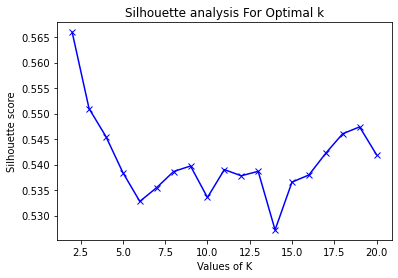

In [12]:
data_room = np.array(list(df_housing_room[['Latitude', 'Longitude', 'Price']].apply(tuple, axis=1)))

#####

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters).fit(data_room)
    # silhouette score
    silhouette_avg.append(silhouette_score(data_room, kmeans.labels_))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
    

plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [13]:
silhouette_avg

[0.5659500562297478,
 0.5509663591780718,
 0.5454808960412879,
 0.5384173247435331,
 0.5327684145675078,
 0.5354852684127925,
 0.5386347374330744,
 0.5397205541656205,
 0.5335431982669624,
 0.5390066320609707,
 0.537800958016954,
 0.5386749655573494,
 0.5271821333660306,
 0.5365574528576978,
 0.5379552397571707,
 0.542234350031031,
 0.5460509685596806,
 0.5473829348447891,
 0.5419267080011768]

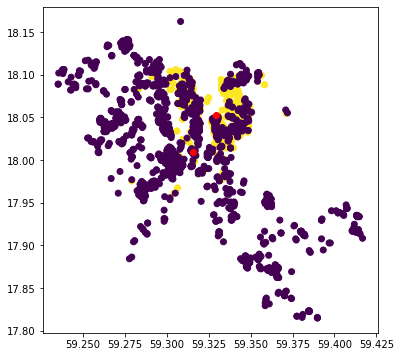

In [14]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(data_room)

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,6)) 
ax = fig.add_subplot(1, 1, 1)
ax.scatter(data_room[:,0],data_room[:,1], c = kmeans.labels_)
fig.canvas.draw()

ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red')

fig.canvas.draw()

In [15]:
result = zip(data_room , kmeans.labels_)

sortedR = sorted(result, key=lambda x: x[1])
#t = np.where(kmeans.labels_ == 1)
sortedR

[(array([5.93363006e+01, 1.79811859e+01, 2.95000000e+06]), 0),
 (array([5.92967064e+01, 1.80917358e+01, 2.95000000e+06]), 0),
 (array([5.92858362e+01, 1.80896759e+01, 2.95000000e+06]), 0),
 (array([5.92830304e+01, 1.80738831e+01, 2.95000000e+06]), 0),
 (array([5.93177356e+01, 1.80285645e+01, 2.95000000e+06]), 0),
 (array([5.93240419e+01, 1.79688263e+01, 2.95000000e+06]), 0),
 (array([5.93170349e+01, 1.80299377e+01, 2.95000000e+06]), 0),
 (array([5.93306972e+01, 1.80484772e+01, 2.95000000e+06]), 0),
 (array([5.93366508e+01, 1.80223846e+01, 2.95000000e+06]), 0),
 (array([5.93240419e+01, 1.80079651e+01, 2.95000000e+06]), 0),
 (array([5.93422533e+01, 1.80889893e+01, 2.95000000e+06]), 0),
 (array([5.93275448e+01, 1.80127716e+01, 2.95000000e+06]), 0),
 (array([5.93187867e+01, 1.80450439e+01, 2.95000000e+06]), 0),
 (array([5.93068721e+01, 1.80780029e+01, 2.95000000e+06]), 0),
 (array([5.93327986e+01, 1.80162048e+01, 2.95000000e+06]), 0),
 (array([5.93198378e+01, 1.80574036e+01, 2.95000000e+06

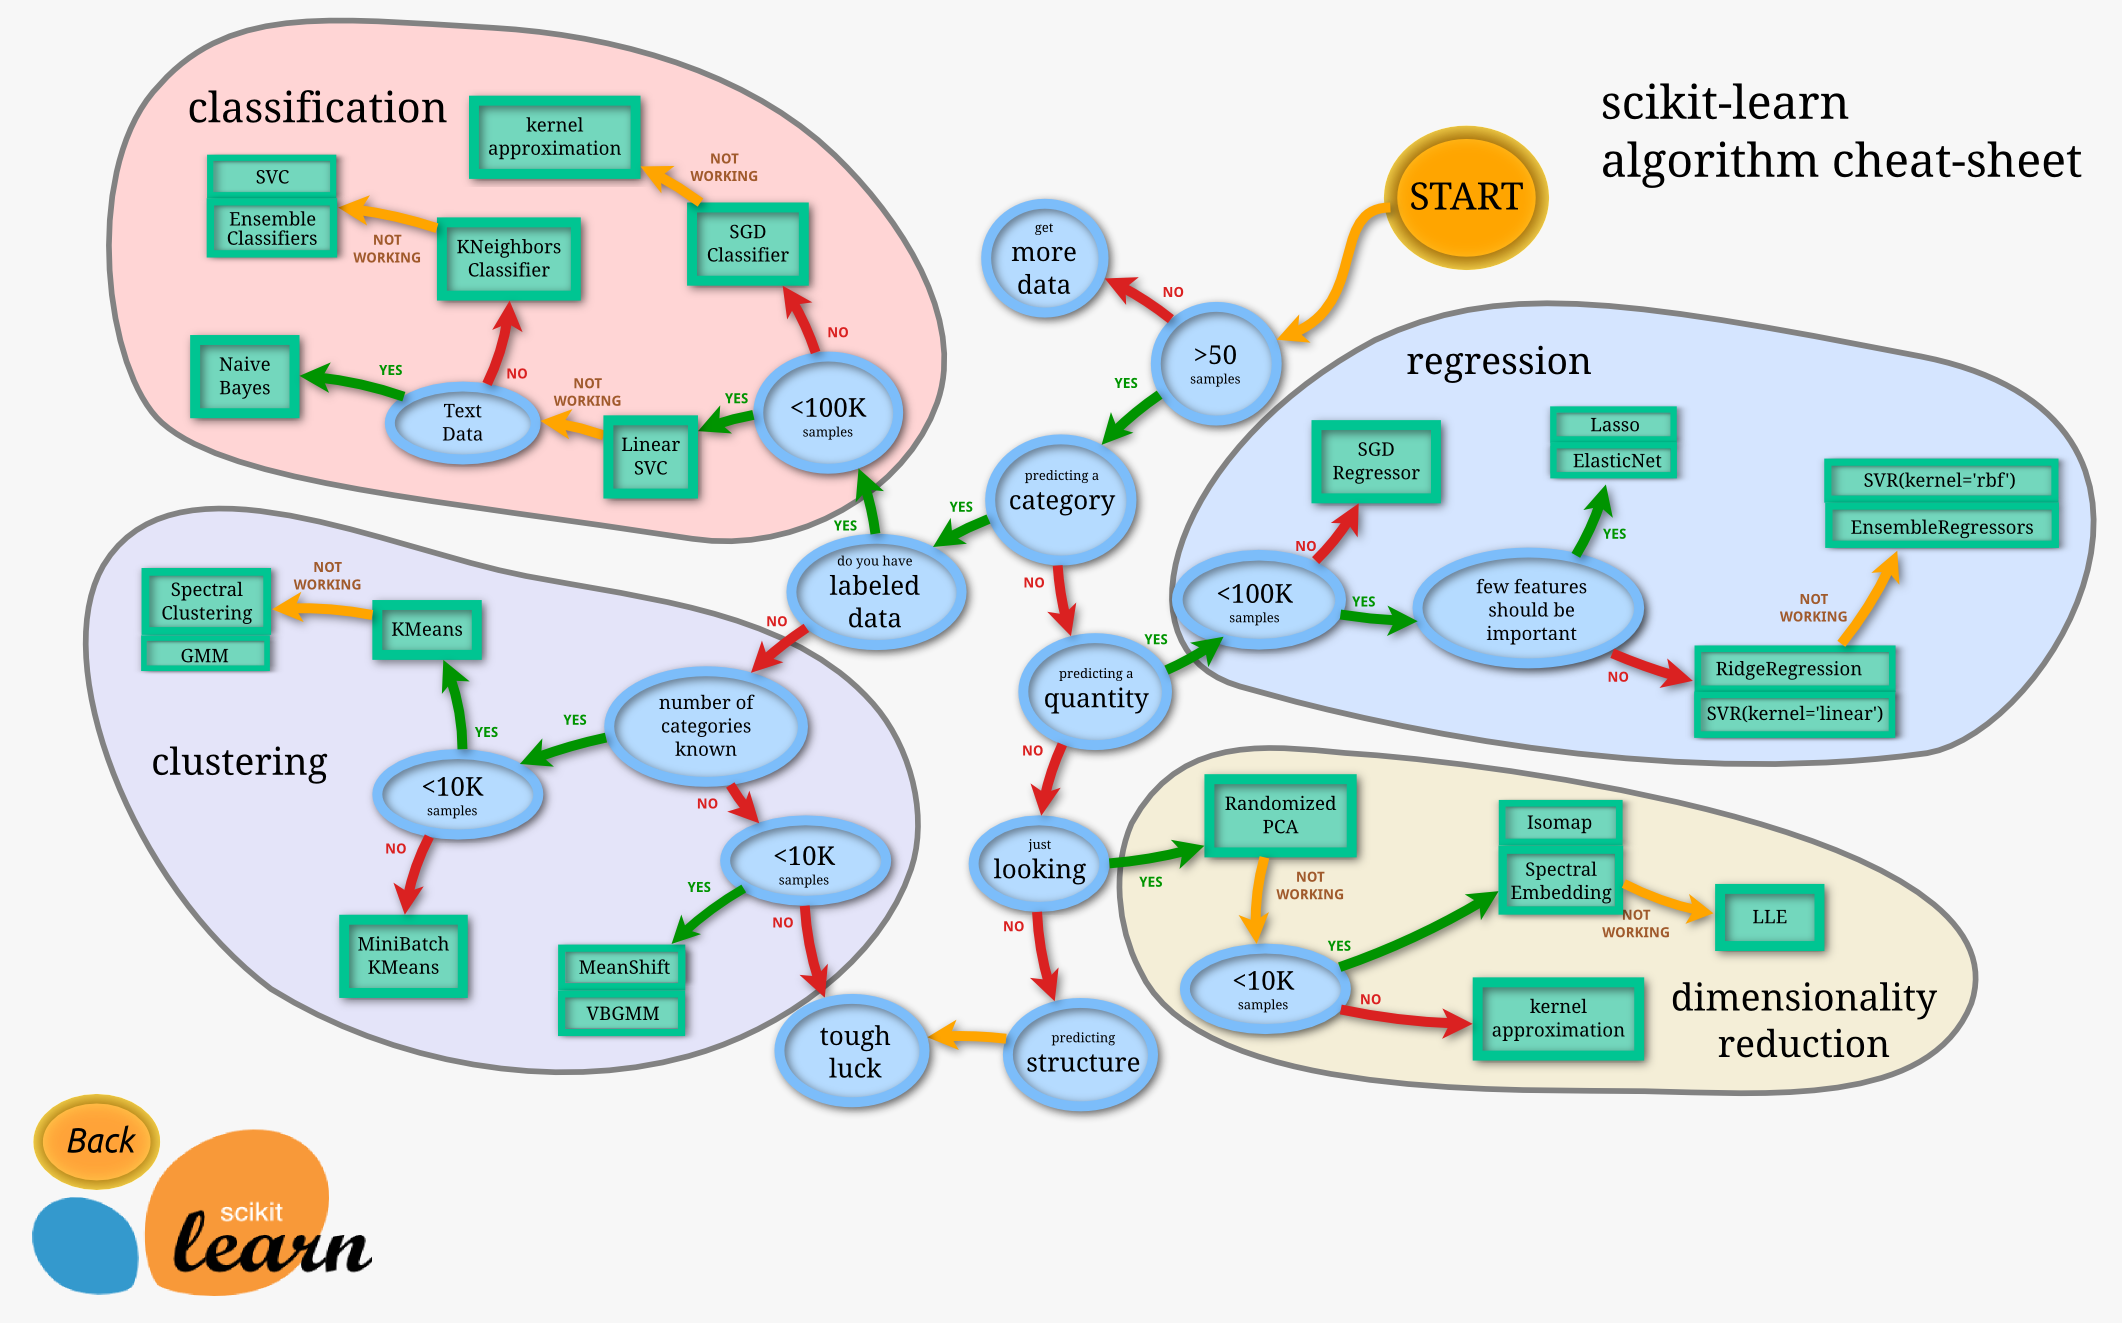

## Inside AIRBNB data 

In [17]:
### Inside AIRBNB data 

from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

df_stock = pd.read_csv('Data/listings_Stockholm.csv')
pd.set_option('display.max_columns', None)



In [18]:
df_stock_cut = df_stock[['latitude', 'longitude', 'neighbourhood_cleansed']]
df_stock_cut

latitude  longitude neighbourhood_cleansed
0     59.301170  18.128330             Skarpnäcks
1     59.316400  18.161120             Östermalms
2     59.402500  17.988280         Rinkeby-Tensta
3     59.313890  18.060870             Södermalms
4     59.317020  18.029460             Södermalms
...         ...        ...                    ...
3985  59.349990  17.919018                 Bromma
3986  59.351926  17.918304                 Bromma
3987  59.350428  17.920177                 Bromma
3988  59.381868  17.950787         Rinkeby-Tensta
3989  59.334611  18.083416             Östermalms

[3990 rows x 3 columns]

# Transforming neighbourhoods into numerical values

In [19]:
neighbourhoods_data_transform = ['Södermalms', 'Östermalms', 'Norrmalms', 'Kungsholmens', 'Bromma', 'Hägersten-Liljeholmens', 'Enskede-Årsta-Vantörs', 'Skarpnäcks', 'Rinkeby-Tensta', 'Hässelby-Vällingby', 'Älvsjö', 'Spånga-Tensta', 'Farsta', 'Skärholmens']
def neighbourhood_to_numeric(x):
        if x in neighbourhoods_data_transform:
            return neighbourhoods_data_transform.index(x)


df_stock_cut['neighbourhood_cleansed'] = df_stock_cut['neighbourhood_cleansed'].apply(neighbourhood_to_numeric)
df_stock_cut

C:\Users\Yann\AppData\Local\Temp\ipykernel_14208\1341939304.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_cut['neighbourhood_cleansed'] = df_stock_cut['neighbourhood_cleansed'].apply(neighbourhood_to_numeric)


latitude  longitude  neighbourhood_cleansed
0     59.301170  18.128330                       7
1     59.316400  18.161120                       1
2     59.402500  17.988280                       8
3     59.313890  18.060870                       0
4     59.317020  18.029460                       0
...         ...        ...                     ...
3985  59.349990  17.919018                       4
3986  59.351926  17.918304                       4
3987  59.350428  17.920177                       4
3988  59.381868  17.950787                       8
3989  59.334611  18.083416                       1

[3990 rows x 3 columns]

In [20]:
df_stock_cut_neighborhood = df_stock_cut.drop(columns=['neighbourhood_cleansed'])
df_stock_cut_neighborhood

latitude  longitude
0     59.301170  18.128330
1     59.316400  18.161120
2     59.402500  17.988280
3     59.313890  18.060870
4     59.317020  18.029460
...         ...        ...
3985  59.349990  17.919018
3986  59.351926  17.918304
3987  59.350428  17.920177
3988  59.381868  17.950787
3989  59.334611  18.083416

[3990 rows x 2 columns]

# Train & test set

In [21]:
x_train,x_test,y_train,y_test = train_test_split(df_stock_cut_neighborhood, df_stock_cut['neighbourhood_cleansed'], random_state=0, train_size =0.2)




# Linear SVC

In [22]:
LSVC = LinearSVC()

LSVC.fit(x_train,y_train)
y_test_LSVC_model = LSVC.predict(x_test)
print("LSVC Accuracy :", accuracy_score(y_test, y_test_LSVC_model))

LSVC Accuracy : 0.2966791979949875


C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# KNearestNeighbor 

In [23]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=2)

# Train the model using the training sets
model.fit(x_train,y_train)

model.score(x_test,y_test)

#Predict Output
predicted= model.predict(x_test)
print("KNeighbor Accuracy :", accuracy_score(y_test, predicted))


KNeighbor Accuracy : 0.9586466165413534


In [24]:
test = model.predict(x_test.iloc[[10]])
test[0]

3

In [25]:
test = model.predict([[59.349990,17.919018]])[0]
test

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


4

In [26]:
x_test.iloc[10]

latitude     59.33266
longitude    18.02663
Name: 675, dtype: float64

## Optimal value of K

In [27]:
trainAccuracy=[]
testAccuracy=[]

In [28]:
#create model for K values from 1 to 40
for k in range(1,40):
    model_knn=KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(x_train,y_train)
    trainAccuracy.append(model_knn.score(x_train,y_train))
    testAccuracy.append(model_knn.score(x_test,y_test))

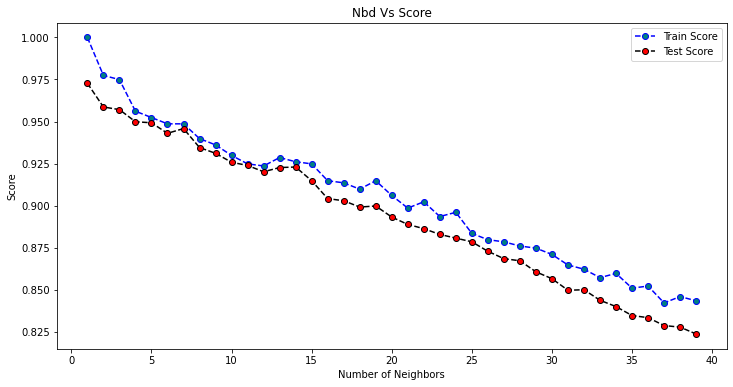

In [29]:
#create a plot using the information from the above loop
plt.figure(figsize=(12,6))
plt.plot(range(1,40),trainAccuracy,label="Train Score",marker="o",markerfacecolor="teal",color="blue",linestyle="dashed")
plt.plot(range(1,40),testAccuracy,label="Test Score",marker="o",markerfacecolor="red",color="black",linestyle="dashed")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Score")
plt.title("Nbd Vs Score")
plt.show()

In [30]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[793,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  4, 320,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  2,  14, 285,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   2, 273,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,  12, 249,   0,   0,   0,   0,   5,   0,   1,   0,
          0],
       [  0,   0,   0,   5,   0, 227,   0,   0,   0,   0,   0,   0,   0,
          1],
       [  1,   0,   0,   0,   0,   6, 219,   0,   0,   0,   0,   0,   5,
          0],
       [  1,   7,   0,   0,   0,   0,   4, 169,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   8,   0,   0,   0, 131,   0,   0,   9,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 108,   0,   2,   0,
          0],
       [  0,   0,   0,   0,   0,   1,   5,   0,   0,   0,  94,   0,   0,
          0],
       [  0,   0,   0,   0,   4,   0,   0, 

Text(159.0, 0.5, 'Actual')

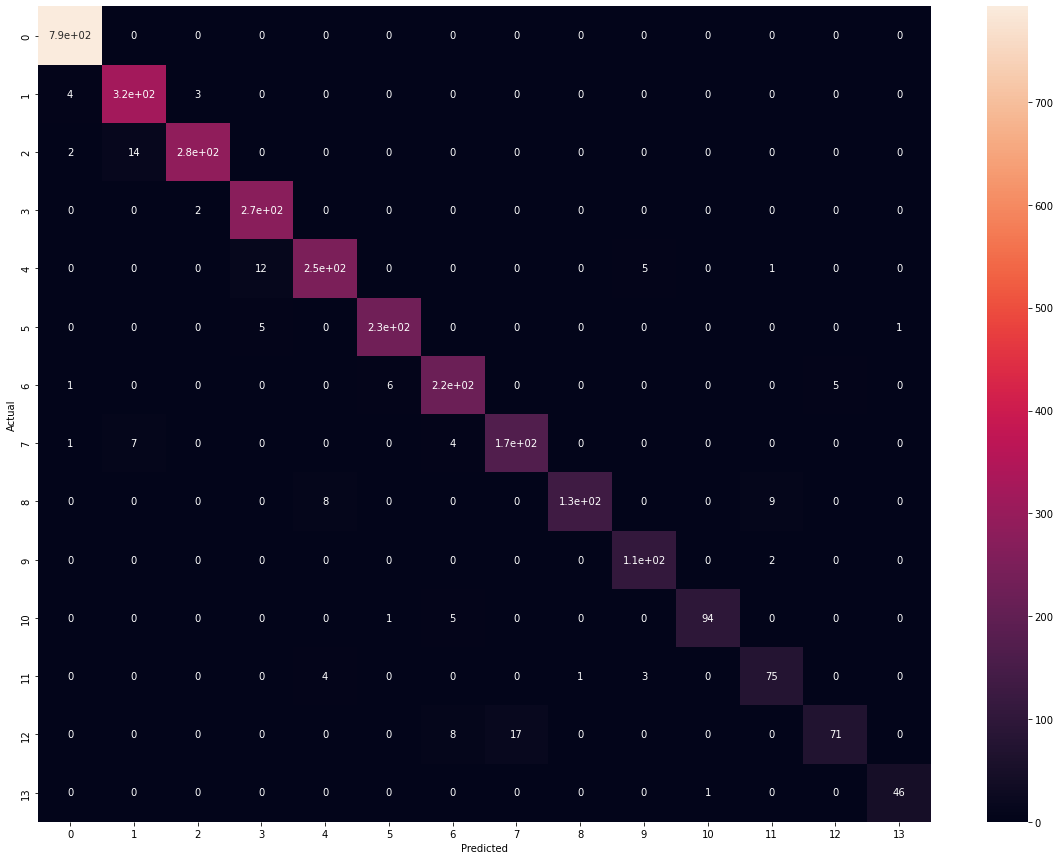

In [31]:
import seaborn as sns

#plot confusion matrix
plt.figure(figsize=(20,15))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [32]:
from sklearn.metrics import classification_report

#Classification Report
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.99      1.00      0.99       793
           1       0.94      0.98      0.96       327
           2       0.98      0.95      0.96       301
           3       0.94      0.99      0.97       275
           4       0.95      0.93      0.94       267
           5       0.97      0.97      0.97       233
           6       0.93      0.95      0.94       231
           7       0.91      0.93      0.92       181
           8       0.99      0.89      0.94       148
           9       0.93      0.98      0.96       110
          10       0.99      0.94      0.96       100
          11       0.86      0.90      0.88        83
          12       0.93      0.74      0.83        96
          13       0.98      0.98      0.98        47

    accuracy                           0.96      3192
   macro avg       0.95      0.94      0.94      3192
weighted avg       0.96      0.96      0.96      3192



### 2 is the perfect amount of K-neighbours required  

In [33]:
# Filling the data with the predictions 
#df_housing['Neighbourhood'] = model.predict([[df_housing['Latitude'], df_housing['Longitude'] ]])[0]
#df_housing['Neighbourhood'] = df_housing['Latitude'] * df_housing['Longitude'] 
df_housing['Neighbourhood'] = 0

In [34]:
def resetCleaning(x):
    return 0

df_housing['Neighbourhood'] = df_housing['Neighbourhood'].apply(resetCleaning)
df_housing

Date               Adress   Size  Rooms             Broker  Rent  \
0       2022105   Lilla Erstagatan 4  149.0      4            Unknown  6262   
1      20210813        Narvavägen 33  129.0      4  Richard Lagerling  5986   
2      20220222       Riddargatan 49  148.0      5  Richard Lagerling  4365   
3      20220330     Styrmansgatan 55  150.0      4  Richard Lagerling  8005   
4      20210913        Sturegatan 58  150.0      4  Richard Lagerling  5649   
...         ...                  ...    ...    ...                ...   ...   
16695  20210913   Skäftingebacken 25   46.0      1            Unknown  3137   
16696  20131115      Bärkingeplan 15  109.0      5            Unknown  6668   
16697   2021075       Talmansgränd 3   32.0      2            Unknown  2246   
16698  20221122         Almbygatan 6   24.0      1            Unknown  1600   
16699   2022048  LM Ericssons väg 20   85.0      4            Unknown  3540   

          Price    Datetime  PricePerKvm  NearbyPOIs   Latitude  Longitude  \
0      45000000  2022-10-05       302013         846  59.316684  18.087616   
1      34000000  2021-08-13       263566         511  59.336651  18.090363   
2      30500000  2022-02-22       206081         616  59.332448  18.090363   
3      27100000  2022-03-30       180667         659  59.336651  18.088303   
4      27000000  2021-09-13       180000        1000  59.342603  18.078690   
...         ...         ...          ...         ...        ...        ...   
16695   1195000  2021-09-13        25978          22  59.396829  17.902908   
16696   1175000  2013-11-15        10780          18  59.392284  17.898102   
16697   1100000  2021-07-05        34375          41  59.278471  18.115082   
16698   1095000  2022-11-22        45625          74  59.392634  17.931061   
16699    769000  2022-04-08         9047          89  59.299511  17.995605   

       Neighbourhood  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
16695              0  
16696              0  
16697              0  
16698              0  
16699              0  

[16700 rows x 13 columns]

In [35]:
#df_housing = df_housing.reset_index()  # make sure indexes pair with number of rows

for index, row in df_housing.iterrows():
    ifor_val = model.predict([[row['Latitude'], row['Longitude'] ]])[0]
    df_housing.at[index,'Neighbourhood'] = ifor_val

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anaconda3_2ndinstall\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Yann\anacon

In [36]:
df_housing

Date               Adress   Size  Rooms             Broker  Rent  \
0       2022105   Lilla Erstagatan 4  149.0      4            Unknown  6262   
1      20210813        Narvavägen 33  129.0      4  Richard Lagerling  5986   
2      20220222       Riddargatan 49  148.0      5  Richard Lagerling  4365   
3      20220330     Styrmansgatan 55  150.0      4  Richard Lagerling  8005   
4      20210913        Sturegatan 58  150.0      4  Richard Lagerling  5649   
...         ...                  ...    ...    ...                ...   ...   
16695  20210913   Skäftingebacken 25   46.0      1            Unknown  3137   
16696  20131115      Bärkingeplan 15  109.0      5            Unknown  6668   
16697   2021075       Talmansgränd 3   32.0      2            Unknown  2246   
16698  20221122         Almbygatan 6   24.0      1            Unknown  1600   
16699   2022048  LM Ericssons väg 20   85.0      4            Unknown  3540   

          Price    Datetime  PricePerKvm  NearbyPOIs   Latitude  Longitude  \
0      45000000  2022-10-05       302013         846  59.316684  18.087616   
1      34000000  2021-08-13       263566         511  59.336651  18.090363   
2      30500000  2022-02-22       206081         616  59.332448  18.090363   
3      27100000  2022-03-30       180667         659  59.336651  18.088303   
4      27000000  2021-09-13       180000        1000  59.342603  18.078690   
...         ...         ...          ...         ...        ...        ...   
16695   1195000  2021-09-13        25978          22  59.396829  17.902908   
16696   1175000  2013-11-15        10780          18  59.392284  17.898102   
16697   1100000  2021-07-05        34375          41  59.278471  18.115082   
16698   1095000  2022-11-22        45625          74  59.392634  17.931061   
16699    769000  2022-04-08         9047          89  59.299511  17.995605   

       Neighbourhood  
0                  0  
1                  1  
2                  1  
3                  1  
4                  1  
...              ...  
16695             11  
16696             11  
16697              7  
16698              8  
16699              5  

[16700 rows x 13 columns]

# FOR ONE ROOM - PRICE

In [37]:
df_housing_room

Date                              Adress  Size  Rooms  \
1241   20211214                        Karlaplan 14  59.0      1   
4543    2022021                      Nybrogatan 57A  53.0      1   
4886    2022094                      Nybrogatan 19B  39.0      1   
4934    2022047                       Mariatorget 7  54.0      1   
5156   20220223              Kungsklippan 11 - 6 tr  42.0      1   
...         ...                                 ...   ...    ...   
16692  20221119                     Hjulstavägen 92  22.0      1   
16693   2021101  Bygärdesvägen 4 - Accepterat pris!  22.0      1   
16694  20221111                  Nykarlebygatan 120  42.5      1   
16695  20210913                  Skäftingebacken 25  46.0      1   
16698  20221122                        Almbygatan 6  24.0      1   

               Broker  Rent     Price    Datetime  PricePerKvm  NearbyPOIs  \
1241          Unknown  1883  11250000  2021-12-14       190678         476   
4543          Unknown  2857   6750000  2022-02-01       127358        1100   
4886   Elise Mattsson  1708   6500000  2022-09-04       166667        1300   
4934          Unknown  1089   6450000  2022-04-07       119444        1400   
5156          Unknown  3457   6260000  2022-02-23       149048        1300   
...               ...   ...       ...         ...          ...         ...   
16692         Unknown  1568   1245000  2022-11-19        56591          72   
16693         Unknown  1452   1225000  2021-10-01        55682          15   
16694         Unknown  3308   1200000  2022-11-11        28235          16   
16695         Unknown  3137   1195000  2021-09-13        25978          22   
16698         Unknown  1600   1095000  2022-11-22        45625          74   

        Latitude  Longitude  
1241   59.338052  18.091049  
4543   59.338052  18.080063  
4886   59.335250  18.077316  
4934   59.317736  18.063583  
5156   59.329997  18.047104  
...          ...        ...  
16692  59.392284  17.929688  
16693  59.380046  17.916641  
16694  59.410809  17.916641  
16695  59.396829  17.902908  
16698  59.392634  17.931061  

[2208 rows x 12 columns]

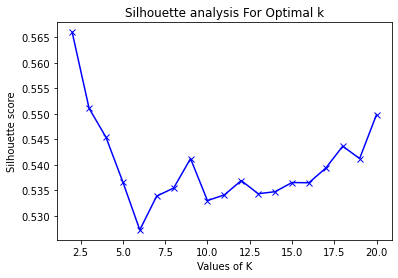

In [38]:
#df_housing_room = df_housing[df_housing['Rooms'] == 1]
#df_housing_room = df_housing[df_housing['Date'].str.contains('2022')]

data_room1 = np.array(list(df_housing_room[['Latitude', 'Longitude', 'Price']].apply(tuple, axis=1)))
#ata_for_plotting1 = np.array(list(df_housing_room[['Latitude', 'Longitude', 'Neighbourhood', 'Price']].apply(tuple, axis=1)))
#####

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters).fit(data_room1)
    # silhouette score
    silhouette_avg.append(silhouette_score(data_room1, kmeans.labels_))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
    

plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [39]:
data_room1

array([[5.93380515e+01, 1.80910492e+01, 1.12500000e+07],
       [5.93380515e+01, 1.80800629e+01, 6.75000000e+06],
       [5.93352501e+01, 1.80773163e+01, 6.50000000e+06],
       ...,
       [5.94108088e+01, 1.79166412e+01, 1.20000000e+06],
       [5.93968291e+01, 1.79029083e+01, 1.19500000e+06],
       [5.93926341e+01, 1.79310608e+01, 1.09500000e+06]])

array([[5.93380515e+01, 1.80910492e+01, 1.12500000e+07],
       [5.93380515e+01, 1.80800629e+01, 6.75000000e+06],
       [5.93352501e+01, 1.80773163e+01, 6.50000000e+06],
       ...,
       [5.94108088e+01, 1.79166412e+01, 1.20000000e+06],
       [5.93968291e+01, 1.79029083e+01, 1.19500000e+06],
       [5.93926341e+01, 1.79310608e+01, 1.09500000e+06]])

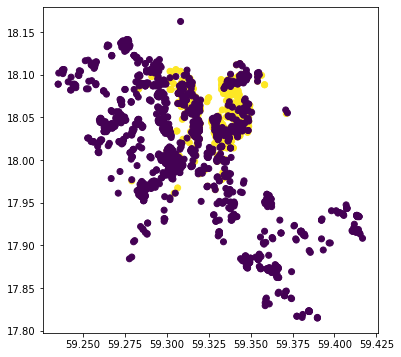

In [40]:

kmeans1 = KMeans(n_clusters=2, random_state=0).fit(data_room1)

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,6)) 
ax = fig.add_subplot(1, 1, 1)
ax.scatter(data_room1[:,0],data_room1[:,1], c = kmeans1.labels_)
fig.canvas.draw()

#ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red')

fig.canvas.draw()
data_room1